In [1]:
##############################################################################
## Open CV sample using watershed transformation: 
## http://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html
##############################################################################


In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

%matplotlib inline


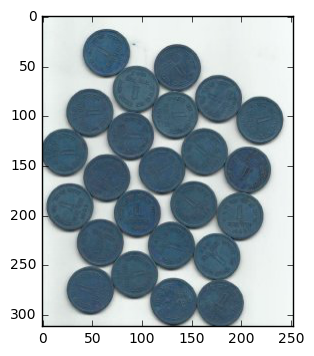

In [10]:

img = cv2.imread('water_coins.jpg')
plt.imshow(img)

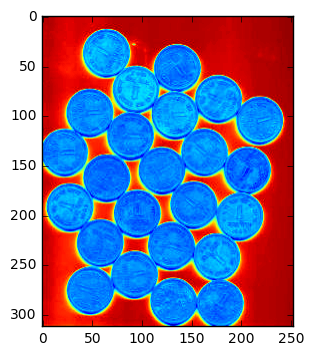

In [11]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [12]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

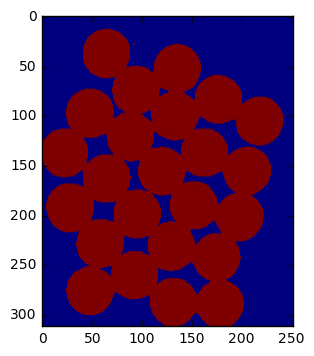

In [15]:
plt.imshow(thresh)

In [16]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)


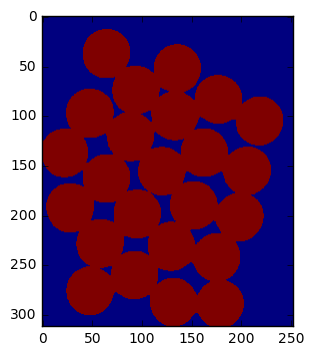

In [18]:
plt.imshow(opening)

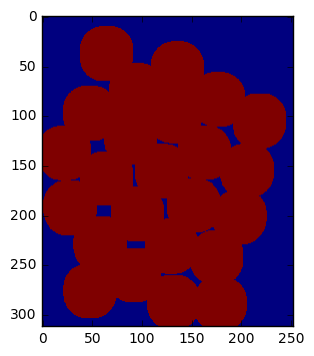

In [20]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

plt.imshow(sure_bg)

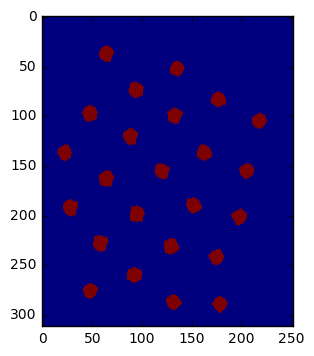

In [21]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

plt.imshow(sure_fg)

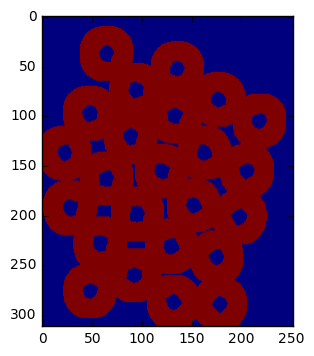

In [22]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown)

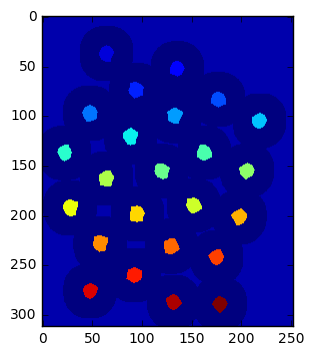

In [23]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.imshow(markers)

In [24]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

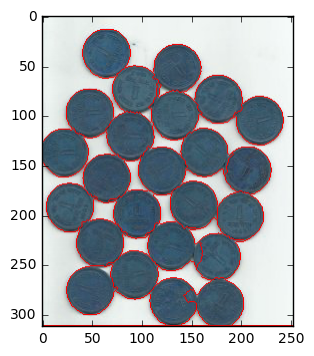

In [25]:
plt.imshow(img)

In [26]:
### Now lets check if we can apply the same principle to our images

In [62]:
import os
import scipy.misc 
ip_files = []
train_files = os.listdir('E:\\SigTuple_Hack\\Test_Data')
ip_files += [f for f in train_files if f.endswith('.jpg') and 'mask' not in f]
#ip_files += [f for f in train_files if f.endswith('.jpg') ]
#ip_files

In [63]:
for img_file in ip_files:
    input_file = 'E:\\SigTuple_Hack\\Test_Data\\' + img_file
    mask_file =  'E:\\SigTuple_Hack\\Test_Data\\Mask\\' + img_file[:-4] + '-mask.jpg'
    #mask_file =  'E:\\SigTuple_Hack\\Test_Data\\BackUp_Masks\\' + img_file[:-9] + '-mask2.jpg'
    
    img = cv2.imread(input_file)
    #plt.imshow(img)
    
    # Gray scale the image
    # Create an approximate estimation of the cells by using OTSU binarization
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    # noise removal ## >>>> Only using the noise removal on the pic with an iteration of 15 gives a 0.65
                    ## This is actually less than the one with a pure ML solution
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 5)
    
    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)
 
    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
    
    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)
    
    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1

    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0
    
    markers = cv2.watershed(img,markers)
    img[markers == -1] = [255,0,0]
    # save the mask
    scipy.misc.imsave(mask_file, img)

In [29]:
img_file = ip_files[0]
input_file = 'E:\\SigTuple_Hack\\Train_Data\\' + img_file
output_file = 'E:\\SigTuple_Hack\\Train_Data\\Mask\\' + img_file[:-4] + '-mask2.jpg'

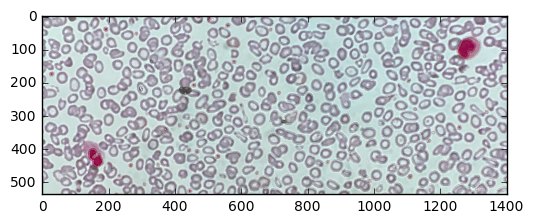

In [31]:
img = cv2.imread(input_file)
plt.imshow(img)

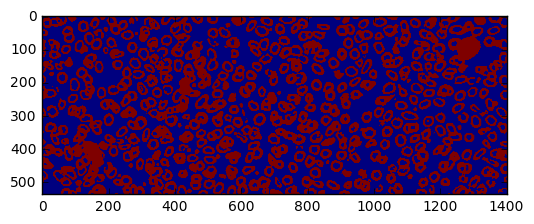

In [33]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh)

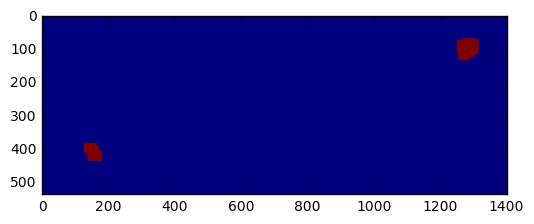

In [45]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 15)

plt.imshow(opening)

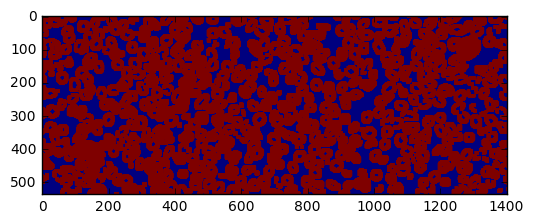

In [35]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg)

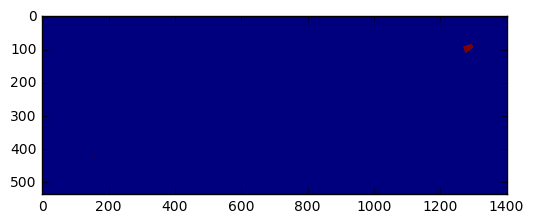

In [36]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

plt.imshow(sure_fg)

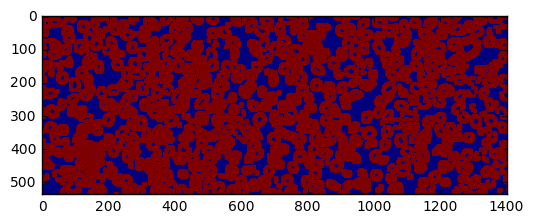

In [37]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown)

In [38]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

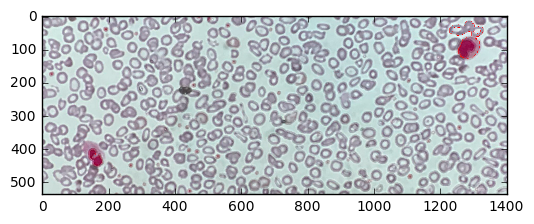

In [39]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(img)

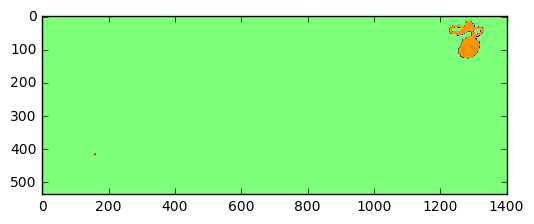

In [57]:
plt.imshow(markers)